In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from scipy.stats import gaussian_kde, norm

In [2]:
import patchworklib as pw
from plotnine import *

<Figure size 100x100 with 0 Axes>

In [3]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")

In [4]:
datajh['place']="JH"
datacm['place']='CM'

In [5]:
data = pd.concat([datajh, datacm], axis=0)

In [62]:
data

,Time,TVOC,Methyl Mercaptan,"1,3-Butadiene",Butene,Acetone/Butane,n-Propanol,Dimethyl Sulfide/Ethyl Mercaptan,Chloroethane,Isoprene,...,Humidity,WindSpeed,Hour_Min_Sec,Hour_Min,Hour,Month,Day,Datetime,seconds,place
0,2022-08-05 11:25:46,45.35,0.000,0.0,0.000,1.00,0.00,1.000,0.000,0.00,...,52.900000,0.0,11:25:46,11:25,11,Aug,5,2022-08-05 11:25:46,41146,JH
1,2022-08-05 11:25:53,56.90,0.000,0.0,0.000,1.00,0.00,0.000,0.000,0.00,...,52.900000,0.0,11:25:53,11:25,11,Aug,5,2022-08-05 11:25:53,41153,JH
2,2022-08-05 11:26:00,52.65,0.000,0.0,0.000,1.00,1.45,0.000,0.000,1.00,...,52.900000,0.0,11:26:00,11:26,11,Aug,5,2022-08-05 11:26:00,41160,JH
3,2022-08-05 11:26:07,71.30,0.000,0.0,0.000,1.00,0.00,0.000,0.000,8.00,...,52.900000,0.0,11:26:07,11:26,11,Aug,5,2022-08-05 11:26:07,41167,JH
4,2022-08-05 11:26:14,57.90,0.000,0.0,0.000,1.00,1.90,0.000,0.200,0.00,...,52.900000,0.0,11:26:14,11:26,11,Aug,5,2022-08-05 11:26:14,41174,JH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51440,2023-08-24 09:36:35,98.35,0.000,0.5,0.210,1.16,1.00,0.000,0.000,1.41,...,65.422500,0.0,09:36:35,09:36,9,Aug,24,2023-08-24 09:36:35,34595,CM
51441,2023-08-24 09:36:42,112.53,0.000,0.0,0.000,1.63,1.27,5.340,0.000,0.00,...,65.505000,0.0,09:36:42,09:36,9,Aug,24,2023-08-24 09:36:42,34602,CM
51442,2023-08-24 09:36:49,81.73,0.345,0.0,0.715,1.37,0.47,1.715,0.185,2.33,...,65.587500,0.0,09:36:49,09:36,9,Aug,24,2023-08-24 09:36:49,34609,CM
51443,2023-08-24 09:36:56,50.85,0.720,1.1,0.640,0.00,0.00,0.000,1.760,0.00,...,65.670000,0.0,09:36:56,09:36,9,Aug,24,2023-08-24 09:36:56,34616,CM


In [6]:
data.columns= ['Time', 'TVOC', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um', '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um', '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um', '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um', 'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons', 'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month', 'Day', 'Datetime', 'seconds', 'place']

In [7]:
np.array(data.columns)

array(['Time', 'TVOC', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene',
       'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan',
       'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
       'Dimethylformamide', 'Ethyl Formate',
       'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
       'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane',
       'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline',
       'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane',
       'n-Heptane', 'Triethylamine', 'n-Propyl Acetate',
       'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
       '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate',
       'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene',
       'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate',
       'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane',
       'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane',
       '1,2,4-Trichlorobenzene', '

In [8]:

# 计算每个分区的残差密度
def compute_density(data, section_label,rat=1,scale=1):
    if len(data['res']) > 1:
        density = gaussian_kde(data['res'])
        xs = np.linspace(data['res'].min(), data['res'].max(), 1000)
        ys = density(xs)
        rescaled_x = max(data['x']) - ys * rat
        mean_y = xs
        return pd.DataFrame({'x': rescaled_x, 'y': mean_y/scale, 'type': 'Empirical', 'group': f"{section_label}_empirical"})
    else:
        return pd.DataFrame()

def add_normal_lines(group, section_label,rat=1,scale=1):
    if len(group['res']) > 1:
        xs = np.linspace(group['res'].min(), group['res'].max(), 1000)
        ys = norm.pdf(xs, group['res'].mean(), group['res'].std())
        rescaled_x = max(group['x']) - ys * rat
        mean_y = xs 
        return pd.DataFrame({'x': rescaled_x, 'y': mean_y/scale, 'type': 'Normal', 'group': f"{section_label}_normal"})
    else:
        return pd.DataFrame()

def remove_outliers(data, columns, iqr_factor=1.5):
    for column in columns:
        if column not in data.columns:
            raise ValueError(f"The column '{column}' does not exist in the DataFrame.")

        # Calculate Q1 and Q3 and the IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - iqr_factor * IQR
        upper_bound = Q3 + iqr_factor * IQR

        # Filter out outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

        # Optional: print out the information about removed outliers
        # print(f"Outliers removed from '{column}'.")

    return data
from scipy.stats import gaussian_kde, norm, entropy
# 计算每个分区的KL散度
def compute_kl_divergence(data):
    if len(data) > 1:
        # 实际数据的PDF
        empirical_kde = gaussian_kde(data)
        xs = np.linspace(data.min(), data.max(), 1000)
        empirical_pdf = empirical_kde(xs)
        empirical_pdf /= np.sum(empirical_pdf)  # 归一化

        # 对应的正态分布的PDF
        mean = data.mean()
        std = data.std()
        normal_pdf = norm.pdf(xs, mean, std)
        normal_pdf /= np.sum(normal_pdf)  # 归一化

        # 计算KL散度
        kl_div = entropy(empirical_pdf, normal_pdf)
        return kl_div
    else:
        return np.nan

In [9]:
# 设置变量
variables = ['Isoprene', '1,1-Dichloroethylene', 'n-Tridecane']
places = ['JH', 'CM']
breaksp=[7,7]
ratp=[0.7,0.7,0.3]
colorcenter=['#96C37D','#C497B2','#F3D266']

In [23]:


plots = []

for i, place in enumerate(places):
    for j, var in enumerate(variables):

        datp = data[data.place==place].groupby("Hour_Min").mean(numeric_only=True).reset_index()

        xy = [var, "Temperature"]
        
        # 生成数据
        x = datp[xy[1]].copy()
        y = datp[xy[0]].copy()
        dat = pd.DataFrame({'x': x, 'y': y})
        dat = remove_outliers(dat, ["x", "y"])
        # 分区
        breaks = np.linspace(dat['x'].min(), dat['x'].max(), breaksp[i])
        dat['section'] = pd.cut(dat['x'], breaks)

   
        dat['res'] = dat['y']
        densities = pd.concat([compute_density(group, label, ratp[j]) for label, group in dat.groupby('section')])
        normal_lines = pd.concat([add_normal_lines(group, label, ratp[j]) for label, group in dat.groupby('section')])
        densities = pd.concat([densities, normal_lines])
        
        # 计算每个分区的KL散度
        kl_divs = dat.groupby('section')['y'].apply(compute_kl_divergence).reset_index()
        kl_divs.columns = ['section', 'kl_divergence']
        kl_divs['kl_label'] = kl_divs['kl_divergence'].apply(lambda x: f'KLD={x:.2f}' if not np.isnan(x) else '')
        kl_divs['section_mid'] = kl_divs['section'].apply(lambda x: x.mid if pd.notnull(x) else np.nan).astype(float)


        
        plot = (ggplot(dat, aes('x', 'y')) +
        geom_point(color=colorcenter[j], alpha=0.3) +
        geom_smooth(method='loess', se=False, color=colorcenter[j], size=1.5) +
        geom_path(data=densities, mapping=aes('x', 'y', color='type', group='group'),size=1, linetype="dashdot") +  # 使用新的 group 列
        geom_vline(xintercept=breaks, linetype="dashed") )
                
        if var==variables[2] and i==0 :
            plot=(plot+labs(x='T (℃)', y=var+' $μg/m^3$') )
        elif var==variables[2] and i==1:
            plot=(plot+labs(x='T (℃)', y='') )
        elif var!=variables[2] and i==0:
            plot=(plot+labs(x='', y=var+' $μg/m^3$') )
        else:
            plot=(plot+labs(x='', y='') )
        
            
        plot=(plot+scale_x_continuous(breaks=np.linspace(dat['x'].min(), dat['x'].max(), 10), labels=lambda x: [f'{val:.2f}' for val in x]) +  # 保留两位小数
        scale_y_continuous(breaks=np.linspace(dat['y'].min(), dat['y'].max(), 5), labels=lambda y: [f'{val:.2f}' for val in y]) +  # 保留两位小数+
        theme_bw() +
        theme(figure_size=(4, 2.5),
              legend_position=(0.3, 0.9),
              legend_title=element_blank(),
              legend_key=element_blank(),
              legend_background=element_blank(),
               text=element_text(family="Times New Roman"),  # 全局文本设置为新罗马字体
        axis_text_x=element_text(family="Times New Roman", size=11, weight='bold'), 
        axis_text_y=element_text(family="Times New Roman", size=11, weight='bold'),  
        axis_title_x=element_text(family="Times New Roman", size=13, weight='bold'), 
        axis_title_y=element_text(family="Times New Roman", size=13, weight='bold'), 
        legend_text=element_text(family="Times New Roman", size=12, weight='bold')))
        
        # 添加 KL 散度注释
        plot += geom_text(
            data=kl_divs, 
            mapping=aes(x='section_mid', y=dat['y'].min() + 0.3 * (dat['y'].max() - dat['y'].min()), label='kl_label'),
            ha='center', 
            va='top', 
            size=12, 
            family="Times New Roman",
    fontweight='bold',
    angle=45 
        )

        
        plots.append(pw.load_ggplot(plot, figsize=(4,2.5)))


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
# 调整布局的间距
pw.param["margin"] = 0
# 使用 patchworklib 创建 2x3 的网格布局
g1, g2, g3, g4, g5, g6 = plots
# 按照 2x3 布局组合图形
combined_plot = (g1 / g2 / g3) | (g4 / g5 / g6)

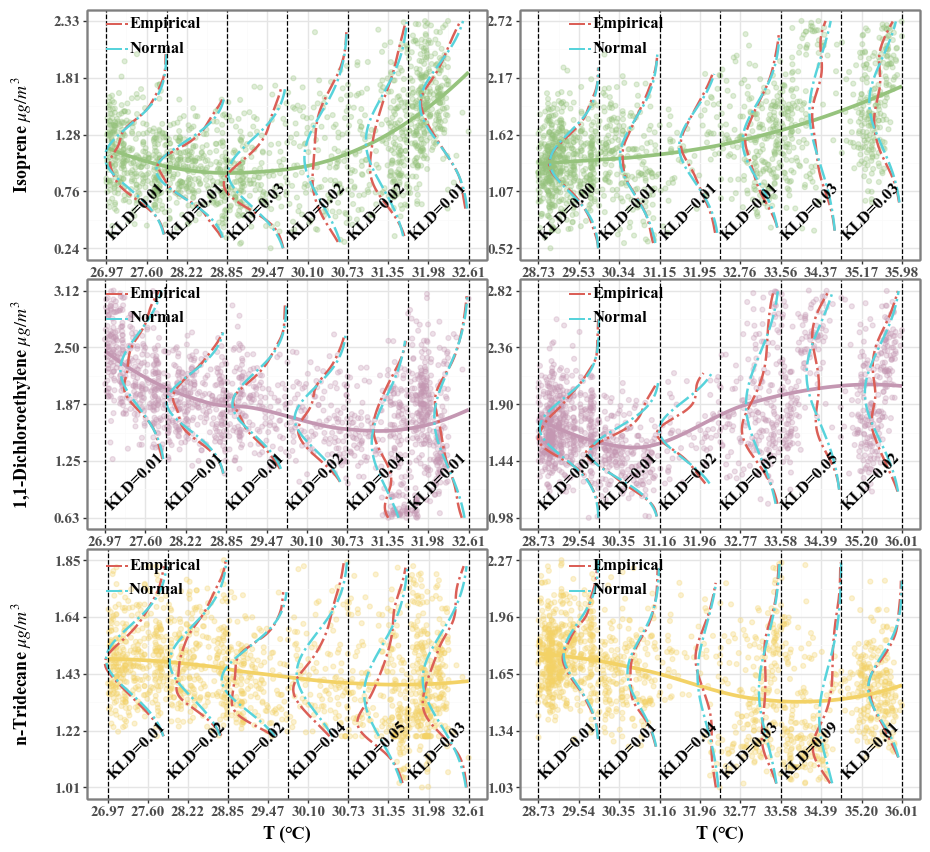

In [25]:
# 保存或显示最终组合图
combined_plot.savefig('变化模式.svg')